## **Importing Libraries**

In [1]:

# for linear algebra
import numpy as np 
# for data processing
import pandas as pd
# for performing mathematical task 
import math
# for colormaps
import matplotlib.cm as cm 
# for plots
import matplotlib.pyplot as plt
import glob
from PIL import Image,ImageOps


## **Importing dataset**

In [2]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
train = pd.read_csv("drive/My Drive/Minor 2/train.csv")
test= pd.read_csv("drive/My Drive/Minor 2/test.csv")
validation=pd.read_csv("drive/My Drive/Minor 2/val_own_digits.csv")

## **Data Insights**

**Shape of data**

In [4]:
print("Shape of train data",train.shape)
print("Shape of test data", test.shape)

Shape of train data (42000, 785)
Shape of test data (28000, 784)


In [5]:
validation.shape

(10, 784)

In [6]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
validation.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007843,0.019608,0.000000,0.007843,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.007843,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019608,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007843,0.003922,0.000000,0.007843,0.000000,0.003922,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.019608,0.000000,0.000000,0.007843,0.000000,0.003922,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,0.003922,0.0,0.031373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.003922,0.003922,0.0,0.015686,0.0,0.0,0.003922,0.003922,0.003922,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

**Checking for Null values**

In [8]:
train.isnull().sum().sum() #Checking for null values in the whole data set

0

**Seperating Pixels and Their Respective Labels**

In [9]:
train_labels = np.array(train.loc[:,'label'])
train_data = np.array(train.loc[:,train.columns!='label'])

In [10]:
train_labels=train_labels[0:5000]
train_labels.reshape(-1,1)

array([[1],
       [0],
       [1],
       ...,
       [8],
       [7],
       [9]])

In [11]:
train_data=train_data[0:5000,:]
train_data.shape

(5000, 784)

**Size of Labels vector**

In [12]:
train_labels.reshape(-1,1)

array([[1],
       [0],
       [1],
       ...,
       [8],
       [7],
       [9]])

**Size of Matrix of pixels**

In [13]:
train_data.shape

(5000, 784)

### **Visualizing Data**

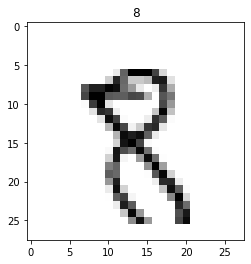

In [14]:
index = 175;
plt.title((train_labels[index]))
plt.imshow(train_data[index].reshape(28,28), cmap = cm.binary)

In [15]:
print(train_labels[index])

8


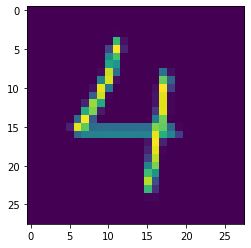

In [16]:
for image in glob.glob('Own_digits/*.png'):
    img = Image.open(image)
    img=ImageOps.grayscale(img)
    plt.imshow(img)
plt.show()

**Count of Occurence of each label**

In [17]:
print('Occurrence of each digit in training data')
y_digits = np.zeros((1,10))

for i in range (10):
    print('Digit ', i, ':', np.count_nonzero(train_labels == i))
    y_digits[0, i-1] = np.count_nonzero(train_labels == i)

Occurrence of each digit in training data
Digit  0 : 494
Digit  1 : 558
Digit  2 : 545
Digit  3 : 480
Digit  4 : 477
Digit  5 : 469
Digit  6 : 516
Digit  7 : 506
Digit  8 : 477
Digit  9 : 478


**Count Plot**

<BarContainer object of 10 artists>

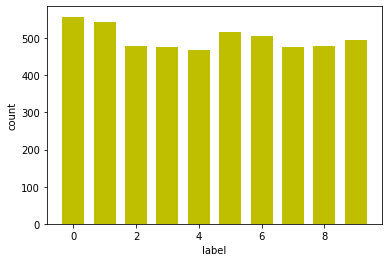

In [18]:
y_digits = y_digits.ravel()
x_value = [0,1,2,3,4,5,6,7,8,9]
plt.xlabel('label')
plt.ylabel('count')
plt.bar(x_value, y_digits, 0.7, color = 'y')

**One hot encoding for training labels**

In [19]:
train_data=np.reshape(train_data,[784,5000])
train_label=np.zeros((10,5000))
for col in range (5000):
    val=train_labels[col]
    for row in range (10):
        if (val==row):
            train_label[val,col]=1
print("train_data shape="+str(np.shape(train_data)))
print("train_label shape="+str(np.shape(train_label)))

train_data shape=(784, 5000)
train_label shape=(10, 5000)


## **Declaring Helper Functions**

In [20]:
# Helper function to plot graph of cost vs iterations
def plot_graph(cost_plot):
       
    x_value=list(range(1,len(cost_plot)+1))
    #print(cost_plot)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.plot(x_value,cost_plot,0.,color='g')

**Defining activation functions**

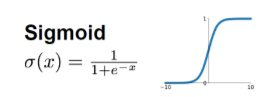

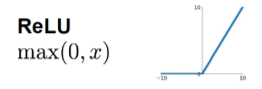

**Softmax**


---


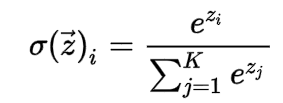

In [21]:
#activation functions sigmoid relu and softmax
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

def softmax(Z):
    e_x = np.exp(Z)
    A= e_x / np.sum(np.exp(Z))  
    cache=Z
    return A,cache

**Derivatives of activation functions**

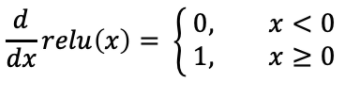

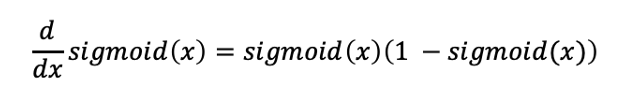

In [22]:
   #derivative of activation function
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def softmax_backward(Z,cache):
    Z=cache
    length=10  
    dZ=np.zeros((5000,10))
    Z=np.transpose(Z)
    for row in range (0,5000):
            den=(np.sum(np.exp(Z[row,:])))*(np.sum(np.exp(Z[row,:])))
            for col in range (0,10):
                sums=0
                for j in range (0,10):
                    if (j!=col):
                        sums=sums+(math.exp(Z[row,j]))
                
                dZ[row,col]=(math.exp(Z[row,col])*sums)/den           
    dZ=np.transpose(dZ)
    Z=np.transpose(Z)

    assert (dZ.shape == Z.shape)
    return dZ


**Initialising weights and biases**


In [23]:

def initialize_parameters(inputL,hiddenL,outputL):
    """
    Input Parameters
    inputL  ==>  size of the input layer
    hiddenL ==>  size of the hidden layer
    outputL ==>  size of the output layer
    
    Output Parameter
    parameters ==>  dictionary containing parameters:
                    W1 ==> weight matrix of shape (hiddenL, inputL)
                    b1 ==> bias vector of shape (hiddenL, 1)
                    W2 ==> weight matrix of shape (outputL, hiddenL)
                    b2 ==> bias vector of shape (outputL, 1)
    """

    W1 = np.random.randn(hiddenL, inputL)*0.01
    b1 = np.zeros((hiddenL,1))
    W2 = np.random.randn(outputL, hiddenL)*0.01
    b2 = np.zeros((outputL,1))

    
    assert(W1.shape == (hiddenL, inputL))
    assert(b1.shape == (hiddenL, 1))
    assert(W2.shape == (outputL, hiddenL))
    assert(b2.shape == (outputL, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters   

In [24]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] =  np.zeros((layer_dims[l], 1))
       
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

## **Forward propagation**

### **Linear forward function**

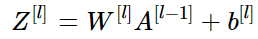

**Calculates Sum of Weighted input**
 


In [25]:
def linear_forward(A, W, b):
    """
    Input Parameters
    A ==> activations/Input from the  previous layer of dimension (size of previous layer, number of examples)
    W ==> weights matrix of dimension (size of current layer, size of previous layer)
    b ==> bias vector of dimension (size of the current layer, 1)
    
    Output Parameter
    Z ==> Weighted sum of activation of previous layer and the input to the activation 
    cache ==> return a tuple storing the input that were passed to calculate Z .This will be used in calculating gradient 

    """
    Z = np.dot(W,A) + b
    cache = (A, W, b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    return Z, cache #(A,W,b)

### **Applying Activation function**

**Applies the desired Activation function to the input  A=g(Z)=g(W*A_prev+b)  where the activation "g" can be sigmoid(), relu() or softmax()**

In [26]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Input Parameters
    A_prev ==> activations/Input from the  previous layer of dimension (size of previous layer, number of examples)
    W ==> weights matrix of dimension (size of current layer, size of previous layer)
    b ==> bias vector of dimension (size of the current layer, 1)
    activation ==> Choice of Activation function
    
    Output Parameter
    A ==> The output of the activation function 
    cache ==> return a tuple storing the input that were passed to Linear_forward function and Activation funciton 

    """
    if activation == "sigmoid":
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = sigmoid(Z)


    elif activation == "relu":
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = relu(Z) 


    elif activation == "softmax":
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = softmax(Z)

    cache = (linear_cache, activation_cache)
    
    return A, cache  #(A,W,b),(Z)

In [27]:

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
        
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
        
       
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    
    #assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

### **Cost function**

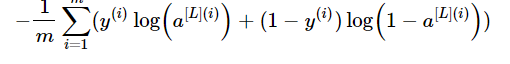

In [28]:
def compute_cost(AL, Y):
    """
    Input Parameters
    AL ==> activation output by the last layer/ Class prediction by our model
    Y  ==> Actual output/Label for comparision
    
    Output Parameter
    Cost ==> cost/loss calculated between our predicted output and original output

    """
    m = Y.shape[1]
    # m ==> count of Training examples 
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    return cost

## **BackPropagation Module**

In Backward propagation, we calculate the gradient of the loss function with respect to the parameters.
####**Implementation of helper functions for backpropagation**

### **Linear Backward**

In the function linear backward, dW for layer l , db for some layer l and dA for previous layer are calculated using:  

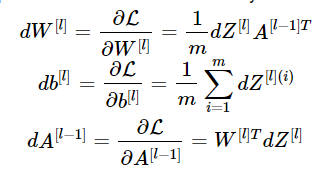

In [29]:
def linear_backward(dZ, cache):
    """
    Input Parameters:
    dZ ==> Gradient of the cost with respect to the linear output 
    cache ==> tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Output:
    dA_prev ==> Gradient of the cost with respect to the activation (of the previous layer l-1)
    dW ==> Gradient of the cost with respect to W (current layer l)
    db ==> Gradient of the cost with respect to b (current layer l)
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)  
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True);
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db

### **Linear Activation Backward**

To implement linear_activation_backward, we have used three backward functions:


*   relu_backward : Implements the backward propagation for RELU unit
*   sigmoid_backward: Implements the backward propagation for SIGMOID unit
*   softmax_backward: Implements the backward propagation for SOFTMAX unit

If  g(.)  is the activation function, sigmoid_backward and relu_backward compute

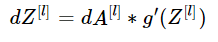






In [30]:
def linear_activation_backward(dA, cache, activation):
    """
    Linear->Activation (for Backpropagation)
    
    Input Parameters:
    dA ==> post-activation gradient for current layer l
    cache ==> tuple of values (linear_cache, activation_cache) for computing backward propagation 
    activation ==> the activation function to be used 
    
    Output:
    dA_prev ==> Gradient of the cost with respect to the activation (of the previous layer l-1)
    dW ==> Gradient of the cost with respect to W (current layer l)
    db ==> Gradient of the cost with respect to b (current layer l)
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)  

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

In [31]:
def L_model_backward(AL, Y, caches):
   
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
   
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
   
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
   
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)],  current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        

    return grads

## **Updating parameters**

Updating parameters of the model using gradient descent for every W and b for each layer l:

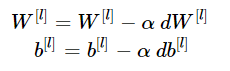

α: learning rate.


In [32]:
'''def update_parameters(parameters, grads, learning_rate):
    """
    Input Parameters:
    parameters ==> dictionary containing parameters 
    grads ==>  dictionary containing gradients
    
    Output:
    parameters ==> dictionary of updated parameters 
    """
    for l in range(len_update-1):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)] - (learning_rate*grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db" + str(l+1)])
    return parameters
    '''

'def update_parameters(parameters, grads, learning_rate):\n    """\n    Input Parameters:\n    parameters ==> dictionary containing parameters \n    grads ==>  dictionary containing gradients\n    \n    Output:\n    parameters ==> dictionary of updated parameters \n    """\n    for l in range(len_update-1):\n        parameters["W" + str(l+1)] =parameters["W" + str(l+1)] - (learning_rate*grads["dW" + str(l+1)])\n        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db" + str(l+1)])\n    return parameters\n    '

In [33]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
   
        
    return parameters

## **Hyperparameters**

In [34]:
'''#defining structure of neural network
layers_dims = (784,15,10) 
len_update=len(layers_dims)
inputL = 784     # num_px * num_px * 3
hiddenL = 15
outputL = 10
layers_dims = (inputL, hiddenL, outputL)'''

'#defining structure of neural network\nlayers_dims = (784,15,10) \nlen_update=len(layers_dims)\ninputL = 784     # num_px * num_px * 3\nhiddenL = 15\noutputL = 10\nlayers_dims = (inputL, hiddenL, outputL)'

In [35]:

# Model Configuration
# len(layer_dims), will be no. of layers with Input & Output layers
layer_dims=[784, 60, 10, 10]

learning_rate=0.005

# No. of Gradient Descent Iterations
num_itr=10000

## **Model Function**

In [36]:

'''def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Network Architechture: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X ==> input data, shape (inputL, number of examples)
    Y ==> true "label" vector (containing 0 if cat, 1 if non-cat), shape (1, number of examples)
    layers_dims ==> dimensions of the layers (inputL, hiddenL, outputL)
    num_iterations ==> number of iterations of the optimization loop
    learning_rate ==> learning rate of the gradient descent update rule
    print_cost ==> If set to True, it will print the cost after every 100 iterations 
    
    Returns:
    parameters ==> dictionary containing W1, W2, b1, and b2
    """
  
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    #Initializing dictionary parameters

    parameters = initialize_parameters(n_x, n_h, n_y)
        
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

        
        # Calculating cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
                
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    #Plotting graph
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundred)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters '''

'def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):\n    """\n    Network Architechture: LINEAR->RELU->LINEAR->SIGMOID.\n    \n    Arguments:\n    X ==> input data, shape (inputL, number of examples)\n    Y ==> true "label" vector (containing 0 if cat, 1 if non-cat), shape (1, number of examples)\n    layers_dims ==> dimensions of the layers (inputL, hiddenL, outputL)\n    num_iterations ==> number of iterations of the optimization loop\n    learning_rate ==> learning rate of the gradient descent update rule\n    print_cost ==> If set to True, it will print the cost after every 100 iterations \n    \n    Returns:\n    parameters ==> dictionary containing W1, W2, b1, and b2\n    """\n  \n    grads = {}\n    costs = []                              # to keep track of the cost\n    m = X.shape[1]                           # number of examples\n    (n_x, n_h, n_y) = layers_dims\n    \n    #Initializing dictionary parameters\n\n    parameters

In [37]:
def image_classifier(X, Y, layer_dims, learning_rate, num_itr, parameters, initialize=False):
    ''' Implements a L-layer NN: 
    [Linear->Relu] *(L-1)times  ->  [Linear->Sigmoid] 
    
    X: Input data(Images) (Height*Weidth*3 , no. of examples)
    Y: True labels, consist of 0/1      (1, no. of examples)
    layer_dims: list, where each value is no. of units.
    learning_rate: for parameters update
    num_itr: no. of iterations of Gradient Descent
    
    Returs:
    parameters: parameters learnt during Model Training.
    '''
    costs=[]
    
    if initialize:
        parameters = initialize_parameters_deep(layer_dims)
    
   
    # Gradient Descent
    for i in range(num_itr):
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
        y_hat, caches = L_model_forward(X, parameters)

        # Compute Cost
        cost = compute_cost(y_hat, Y)

        # Backward propagation
        grads = L_model_backward(y_hat, Y, caches)

        # Update Parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i%100 ==0:
            print(f"cost {i}: {np.squeeze(cost)}")
        if i%100 ==0:
            costs.append(cost)

    # Ploting the Cost
    plt.plot(costs)
    plt.xlabel("n iteration")
    plt.ylabel("cost")
    
    return parameters

In [38]:
'''#variable parameter in network learning_rate, iterations 
parameters = two_layer_model(train_data, train_label, layers_dims,learning_rate=0.0005, num_iterations=3000, print_cost=True) 
print("training done")'''

'#variable parameter in network learning_rate, iterations \nparameters = two_layer_model(train_data, train_label, layers_dims,learning_rate=0.0005, num_iterations=3000, print_cost=True) \nprint("training done")'

cost 0: 6.978551110625735
cost 100: 3.261441279249
cost 200: 3.2541434553302966
cost 300: 3.246158330262362
cost 400: 3.233354930236682
cost 500: 3.2092467768762782
cost 600: 3.1645506682516666
cost 700: 3.1064322766292225
cost 800: 3.0571277868806597
cost 900: 2.9513700410169794
cost 1000: 2.8754302062365107
cost 1100: 2.7146416627275505
cost 1200: 2.749778672953645
cost 1300: 2.360903919499898
cost 1400: 2.3926418557213345
cost 1500: 2.3861163191994117
cost 1600: 1.7378738613393767
cost 1700: 1.6420111806379032
cost 1800: 1.48754219382624
cost 1900: 1.4269858228597856
cost 2000: 2.001311140350493
cost 2100: 1.1510145531675877
cost 2200: 1.9225021627289063
cost 2300: 0.7533461764714675
cost 2400: 1.4660812831921146
cost 2500: 1.3457789033116592
cost 2600: 0.6212427977158623
cost 2700: 0.4043432359609145
cost 2800: 0.17918819948124323
cost 2900: 0.15387046672116308
cost 3000: 0.11265624714250498
cost 3100: 0.08640320052904621
cost 3200: 0.0695243303556602
cost 3300: 0.05765051171172346

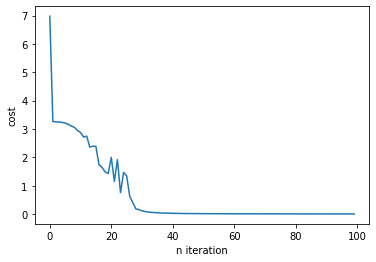

In [40]:
parameters=image_classifier(train_data, train_label, layer_dims, 0.005, 10000, 0, initialize=True)

In [41]:
def predict_L_layer(X,parameters):
    AL,caches=L_model_forward(X,parameters)
    prediction=np.argmax(AL,axis=0)
    return prediction.reshape(1,prediction.shape[0])
validation=np.reshape([validation],[784,10])
predictions_test_L = predict_L_layer(validation, parameters)
label=[[1,9,6,7,0,2,4,5,3,8]]

predictions_test_L = predict_L_layer(validation, parameters)
print("Labels:", label)
print("Predicted:",predictions_test_L)

Labels: [[1, 9, 6, 7, 0, 2, 4, 5, 3, 8]]
Predicted: [[5 4 8 8 4 9 6 6 7 6]]
